##  music21 exercise 2
Q. **How is the _usul aksaksemai_ realized in melodic surface?**

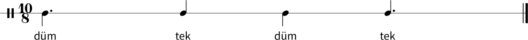

M. *Plot a bar chart with the number of notes that start at each beat of the* usul *(measure) from all the scores in the corpus which contain this* usul.

In [ ]:
from music21 import *
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt

The naming convention of the xml files in the SymbTr collection is as follows:

`makam--form--usul--lyrics--composer.xml`

First retrieve all the xml files that contains the *aksaksemai usul*.

In [ ]:
folder = '../../SymbTr-2.4.3/MusicXML' # Write here the path to the folder that contains the SymbTr xml scores

allScores = os.listdir(folder)

aksaksemaiScores = []

for f in allScores:
    if f.split('--')[2] == 'aksaksemai':
        aksaksemaiScores.append(f)
        
print('Found {} scores with aksaksemai usul'.format(len(aksaksemaiScores)))

Count how many notes start in each beat of the measures. For that, the `.beat` attribute can be called for each note. To load the xml scores in music21, the key signature in the xml file should be previously removed to avoid errors.

In [ ]:
beatsDic = {}

# Create a folder to contain the xml scores without key signature
newFolder = 'aksaksemaiScores'
os.mkdir(newFolder)

for makamScore in aksaksemaiScores:
    
    # Remove the key signature from the xml file
    tree = ET.parse(os.path.join(folder, makamScore))
    root = tree.getroot()
    
    for k in root.iter('key'):
        for ks in k.findall('key-step'):
            k.remove(ks)
        for ka in k.findall('key-accidental'):
            k.remove(ka)
        for ka in k.findall('key-alter'):
            k.remove(ka)
    
    # Save the new xml files to be later loaded with music21
    newMakamScore = os.path.join(newFolder, makamScore[:-4] + '_withoutKeySignature.xml')
    tree.write(newMakamScore)
    
    # Load the file in music21 and get a stream with all the notes
    s = converter.parse(newMakamScore)
    nn = s.parts[0].flat.notes.stream()
    
    # Count the notes per beat
    for n in nn:
        beatsDic[n.beat] = beatsDic.get(n.beat, 0) + 1 # Use the .beat attibute

In [ ]:
beatsDic

Plot the bar chart.

In [ ]:
# Order the beats
xValues = sorted(beatsDic.keys())
yValues = [beatsDic[x] for x in xValues]

# These are the beats where notes are played according to theory
aksaksemaiBeats = [1, 4, 6, 8]

plt.bar(xValues, yValues, width=0.2)
# Draw a vertical red line to better compare the results with theory
for beat in aksaksemaiBeats:
    plt.axvline(beat, color='red')
plt.xticks(aksaksemaiBeats, aksaksemaiBeats)
plt.show()